# Predicting heart disease using machine learning

**Approach:**
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

> The original data came from the Cleaveland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+disease

> There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

Different information about each of the features in the data can be found here.

**Create data dictionary**

1.) age: age in years  
2.) sex: sex (1 = male; 0 = female)  
3.) cp: chest pain type  
* Value 1: typical angina  
* Value 2: atypical angina  
* Value 3: non-anginal pain  
* Value 4: asymptomatic
4.) trestbps: resting blood pressure (in mm Hg on admission to the hospital)  
5.) chol: serum cholestoral in mg/dl  
6.) fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)  
7.) restecg: resting electrocardiographic results
* Value 0: normal  
* Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)  
* Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria  
8.) thalach: maximum heart rate achieved  
9.) exang: exercise induced angina (1 = yes; 0 = no)  
10.) oldpeak = ST depression induced by exercise relative to rest  
11.) slope: the slope of the peak exercise ST segment
* Value 1: upsloping  
* Value 2: flat  
* Value 3: downsloping  
12.) ca: number of major vessels (0-3) colored by flourosopy  
13.) thal: 3 = normal; 6 = fixed defect; 7 = reversable defect  
14.) target: diagnosis of heart disease (angiographic disease status)(the predicted attribute)
* Value 0: < 50% diameter narrowing (no)  
* Value 1: > 50% diameter narrowing (yes)  
(in any major vessel: attributes 59 through 68 are vessels)

## Preparing the tools

We are going to use Pandas, Matplotlib and Numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need

# Regular EDA(exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, plot_roc_curve, accuracy_score
from sklearn.inspection import permutation_importance

## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df.shape  #(rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the dataset you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do you have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. What are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of the data?

In [3]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# How many of each class are there?
df['target'].value_counts() 

# df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

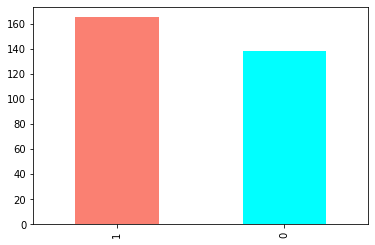

In [5]:
df['target'].value_counts().plot(kind='bar',
                                 color=['salmon', 'aqua']);

In [6]:
# Any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
# Info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# Description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Comparing 1 feature column with the label column

### Heart disease frequency per Sex

In [9]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
pd.crosstab(df.sex, df.target)

target,0,1
sex,,
0,24,72
1,114,93


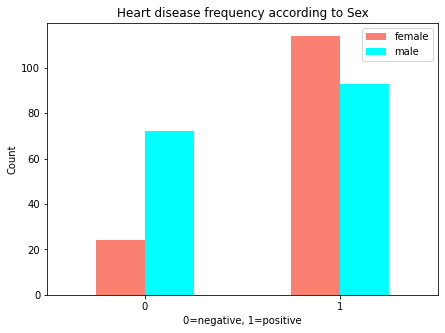

In [11]:
pd.crosstab(df.sex, df.target).plot(kind='bar',
                                    color=['salmon', 'aqua'],
                                    figsize=(7,5))
plt.title('Heart disease frequency according to Sex')
plt.xlabel('0=negative, 1=positive')
plt.ylabel('Count')
plt.legend(['female', 'male'])
plt.xticks(rotation=0);

In [12]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [13]:
df.thalach.value_counts()

162    11
163     9
160     9
152     8
173     8
       ..
128     1
129     1
134     1
137     1
202     1
Name: thalach, Length: 91, dtype: int64

## Age vs. Max heart rate

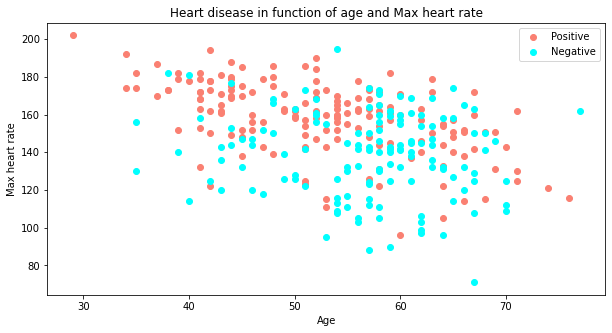

In [14]:
# Create another figure
plt.figure(figsize=(10,5))

# Scatter with positive examples in 'target'
plt.scatter(df.age[df.target==1], df.thalach[df.target==1],
            c='salmon')

#Scatter with negative examples in 'target'
plt.scatter(df.age[df.target==0], df.thalach[df.target==0],
            c='aqua')

# Helpful info
plt.title('Heart disease in function of age and Max heart rate')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Positive', 'Negative']);

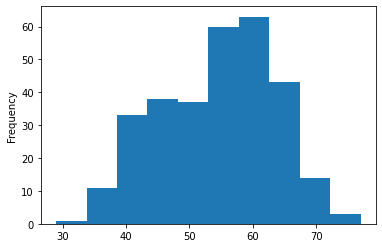

In [15]:
# Check the distribution of age column with a histogram
df.age.plot.hist();

## Heart disease frequency per Chest Pain Type
3.) cp: chest pain type  
* Value 1: typical angina  
* Value 2: atypical angina  
* Value 3: non-anginal pain  
* Value 4: asymptomatic

In [16]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [17]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


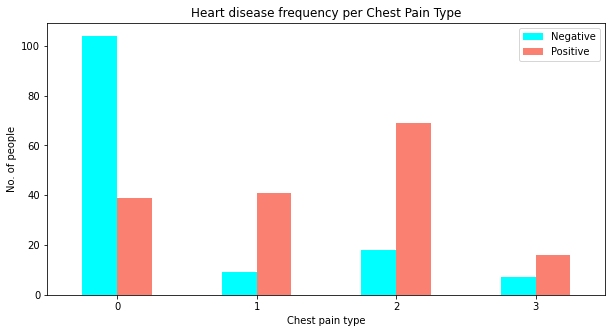

In [18]:
pd.crosstab(df.cp, df.target).plot(kind='bar',
                                   figsize=(10,5),
                                   color=['aqua', 'salmon'])

plt.title('Heart disease frequency per Chest Pain Type')
plt.xlabel('Chest pain type')
plt.ylabel('No. of people')
plt.legend(['Negative', 'Positive'])
plt.xticks(rotation=0);

In [19]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


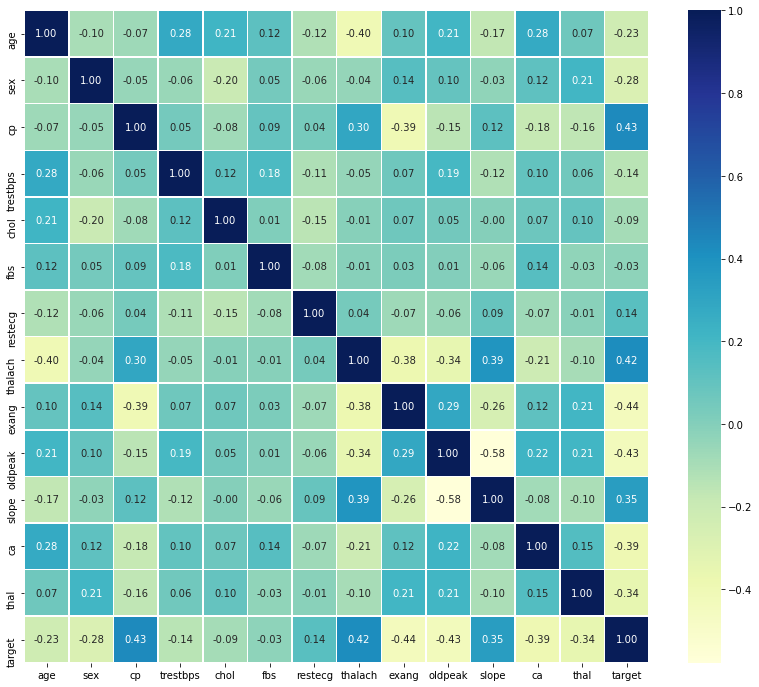

In [20]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(14,12))
ax = sns.heatmap(corr_matrix,
                 annot=True,       # write inside cells
                 linewidths=0.5,   # space between cells
                 fmt='.2f',        # decimal points
                 cmap='YlGnBu');


## 5. Modelling

In [21]:
X = df.drop('target', axis=1)
y = df['target']

In [22]:
np.random.seed(23)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

- Data is split and ready  
- Time to build ML model  
- Training on training set. (find patterns)  
- Testing on test set. (use the patterns)

Trying 3 ML models:
1. Logistic Regression
2. K-Nearest Neighbours Classifier
3. Random Forest Classifier

In [23]:
models = {'Logistic Regression': LogisticRegression(),
          'KNN': KNeighborsClassifier(),
          'Random Forest': RandomForestClassifier()}

# Create a function to fit and score the models

def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given ML models.
    models: dict of different Scikit-Learn ML models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: testing labels
    '''
    np.random.seed(23)
    
    model_scores = {}
    
    for name, models in models.items():
        models.fit(X_train, y_train)
        model_scores[name] = models.score(X_test, y_test)
    return model_scores

In [24]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             y_train=y_train,
                             X_test=X_test,
                             y_test=y_test)
model_scores

C:\Users\Hansie\sample_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

### Model Comparison

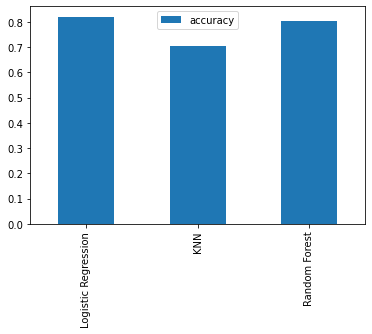

In [25]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

Now baseline model is ready.

Let's look at the following now:
- Hyperparameter tuning
- Feature Importance
- Confusion Matrix
- Cross-validation
- Precision
- Recall
- F1 score
- Classification report
- ROC curve
- Area under the curve (AUC)

### Hyperparameter Tuning

In [26]:
train_scores = []
test_scores = []

neighbors = range(1, 21)
knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [27]:
train_scores

[1.0,
 0.7892561983471075,
 0.7768595041322314,
 0.731404958677686,
 0.7768595041322314,
 0.7355371900826446,
 0.7355371900826446,
 0.71900826446281,
 0.71900826446281,
 0.6900826446280992,
 0.6776859504132231,
 0.6776859504132231,
 0.6859504132231405,
 0.6942148760330579,
 0.6528925619834711,
 0.6652892561983471,
 0.6694214876033058,
 0.6570247933884298,
 0.6652892561983471,
 0.6859504132231405]

In [28]:
test_scores

[0.6557377049180327,
 0.6229508196721312,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7540983606557377,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7377049180327869,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7540983606557377]

Maximum KNN score on the test data: 75.41%


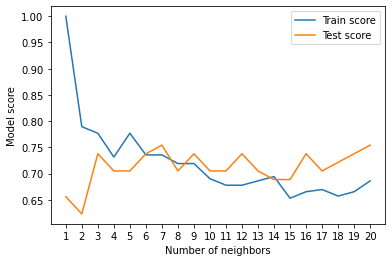

In [29]:
plt.plot(neighbors, train_scores, label='Train score')
plt.plot(neighbors, test_scores, label='Test score')
plt.xticks(np.arange(1, 21, 1))
plt.xlabel('Number of neighbors')
plt.ylabel('Model score')
plt.legend()

print(f'Maximum KNN score on the test data: {max(test_scores)*100:.2f}%')

### Hyperparameter tuning with RandomizedSearchCV

Trying to tune:
* LogisticRegression()
* RandomForestClassifier()

In [30]:
# Create a hyperparameter grid for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4, 4, 20),
                'solver': ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier()
rf_grid = {'n_estimators': np.arange(10, 1000, 50),
           'max_depth': [None, 3, 5, 10],
           'min_samples_split': np.arange(2, 20, 2),
           'min_samples_leaf': np.arange(1, 20, 2)}

In [31]:
# Tune LogisticRegression()

np.random.seed(23)

rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [33]:
rs_log_reg.score(X_test, y_test)  # gives same result as earlier

0.819672131147541

In [34]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

In [35]:
# Tune RandomForestClassifier()

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions = rf_grid,
                           cv = 5,
                           n_iter = 20,
                           verbose = True)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [37]:
rs_rf.score(X_test, y_test)  # result increased from the earlier score

0.8360655737704918

In [38]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

### Hyperparameter tuning with GridSearchCV

Trying to tune:
* LogisticRegression()
* RandomForestClassifier()

In [39]:
# Create a different hyperparameter grid for LogisticRegression()
log_reg_grid = {'C': np.logspace(-4, 4, 30),
                'solver': ['liblinear']}

# Create a different hyperparameter grid for RandomForestClassifier()
rf_grid = {'n_estimators': np.arange(10, 500, 50),
           'max_depth': [5],
           'min_samples_split': np.arange(10, 20, 3),
           'min_samples_leaf': np.arange(10, 20, 3)}

In [40]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          verbose = 2)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........................C=0.0001, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END .........C=0.00018873918221350977, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, solver=liblinear; total time=   0.0s
[CV] END ..........C=0.0003562247890262444, sol

[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=32.90344562312671, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END ..............C=62.10169418915616, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.21022975334793, solver=liblinear; total time=   0.0s
[CV] END .............C=117.

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=2)

In [41]:
gs_log_reg.best_params_

{'C': 1.3738237958832638, 'solver': 'liblinear'}

In [42]:
gs_log_reg.score(X_test, y_test)

0.819672131147541

In [43]:
model_scores

{'Logistic Regression': 0.819672131147541,
 'KNN': 0.7049180327868853,
 'Random Forest': 0.8032786885245902}

In [ ]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                     param_grid = rf_grid,
                     cv = 5,
                     verbose = 2)

gs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_sa

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=13, n_estimators=360;

[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=19, n_estimators=210;

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=13, n_estimators=10; to

[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=13, min_samples_split=16, n_estimators=310;

[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=110; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=10, n_estimators=160; tot

[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=410; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=13, n_estimators=460;

[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=160; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=210; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=260; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=16, min_samples_split=19, n_estimators=260;

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=10, n_estimators=460; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=60; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=13, n_estimators=60; total ti

[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=310; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=360; total time=   0.3s
[CV] END max_depth=5, min_samples_leaf=19, min_samples_split=16, n_estimators=360;

In [ ]:
gs_rf.best_params_

In [ ]:
gs_rf.score(X_test, y_test)

In [ ]:
model_scores

## Evaluating our tuned ML classifier, beyond accuracy

* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

Try using cross-validation wherever possible.

To make comparisons and evaluate our trained model, first we need to predict.

In [ ]:
# Make predictions with the tuned model with best results.

y_preds = gs_rf.predict(X_test)

In [ ]:
y_preds

In [ ]:
y_test

In [ ]:
# plot ROC curve and calculate AUC metrics

plot_roc_curve(gs_rf, X_test, y_test);

In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

In [ ]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    '''
    Plots confusion matrix using Seaborn's heatmap()
    '''
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')

plot_conf_mat(y_test, y_preds)

Checking classification report as well as cross-validated precision, recall and f1-score.

In [ ]:
print(classification_report(y_test, y_preds))  # this report is calculated using only one test split (1-fold)

## Calculate evaluation metrics using cross-validation

Calculating accuracy, precision, recall and f1-score of our model using `cross_val_score()`

In [ ]:
# Check best hyperparameters
gs_rf.best_params_

In [ ]:
# create a new classifier with the best hyperparameters
clf = RandomForestClassifier(max_depth=5,
                             min_samples_leaf=19,
                             min_samples_split=13,
                             n_estimators=110)

In [ ]:
# Cross-validation for accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
cv_acc = np.mean(cv_acc)
cv_acc

In [ ]:
# Cross-validation for precision
cv_precision = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='precision')
cv_precision = np.mean(cv_precision)
cv_precision

In [ ]:
# Cross-validation for recall
cv_recall = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='recall')
cv_recall = np.mean(cv_recall)
cv_recall

In [ ]:
# Cross-validation for recall
cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='f1')
cv_f1 = np.mean(cv_f1)
cv_f1

In [ ]:
# Visualize the cross-validated metrics
cv_metrics = pd.DataFrame({'Accuracy': cv_acc, 'Precision': cv_precision, 'Recall': cv_recall, 'F1':cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title='Cross-validated classification metrics',
                      legend=False);

## Feature Importance

Feature importance means asking 'which features contribute most to the outcomes of the model and how do they contribute?'

Finding feature importance is different for each ML model. (Try searching "`model name` feature importance")

In [ ]:
gs_log_reg.best_params_

In [ ]:
# Fit an instance of LogisticRegression with the best hyperparameters
clf = LogisticRegression(C=1.3738237958832638,
                         solver='liblinear')
clf.fit(X_train, y_train);

In [ ]:
# Check coef_
clf.coef_

In [ ]:
# match and create a dictionary of column names and the corresponding coef values

feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

In [ ]:
# Visualize

feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance for LogisticRegression using "coef_"',
                      legend=False,
                      figsize=(10, 8));

In [ ]:
pd.crosstab(df['sex'], df['target'])

In [ ]:
pd.crosstab(df['slope'], df['target'])

In [ ]:
gs_rf.best_params_

In [ ]:
clf = RandomForestClassifier(max_depth=5,
                             min_samples_leaf=16,
                             min_samples_split=19,
                             n_estimators=360)
clf.fit(X_train, y_train);

In [ ]:
clf.feature_importances_

In [ ]:
feature_dict = dict(zip(df.columns, clf.feature_importances_))

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance for RandomForestClassifier using "feature_importances_"',
                      legend=False,
                      figsize=(10, 8));

In [ ]:
perm_imp = permutation_importance(clf, X_test, y_test)

In [ ]:
imp_mean = perm_imp.importances_mean
imp_mean

In [ ]:
feature_dict = dict(zip(df.columns, imp_mean))
feature_dict

In [ ]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title='Feature Importance for RandomForestClassifier using "permutation_importance"',
                    legend=False,
                    figsize=(10, 8));

## 6. Experimentation

Ask questions like...

* Could you collect more data?
* Could you try a better model? Like CatBoost or XGBoost?
* Could you imporove the current models? (beyond what we've done so far)
* If the model has hit the evaluation metric already then how to export it and share it with others?